# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn.metrics import mean_squared_error

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [2]:
file_path = r"C:\Users\Yvaine\bootcamp_Rui_Han\homework\stage09_Feature-Engineering\data\personal_finance_tracker_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,date,user_id,monthly_income,monthly_expense,budget_goal,financial_scenario,credit_score,debt_to_income_ratio,loan_payment,investment_amount,...,discretionary_spending,essential_spending,income_type,rent_or_mortgage,category,cash_flow_status,financial_advice_score,financial_stress_level,actual_savings,savings_goal_met
0,2019/1/1,1584,3119.58,3156.576,3676.11,inflation,721,0.56,125.77,689.22,...,857.55,1910.85,Freelance,1501.65,Investments,Positive,8.3,Low,0.00,0
1,2019/1/31,1045,3262.44,3450.588,2607.17,inflation,670,0.42,454.19,360.34,...,534.51,3165.20,Salary,1603.17,Investments,Positive,22.6,Low,0.00,0
2,2019/3/2,1756,2931.20,3092.952,3004.14,inflation,691,0.24,971.82,0.00,...,353.67,1504.56,Freelance,1097.82,Healthcare,Positive,58.8,Low,0.00,0
3,2019/4/1,1724,3506.79,3035.110,3346.97,normal,717,0.16,482.76,182.06,...,594.08,1450.72,Freelance,1155.64,Groceries,Positive,74.5,Low,1179.20,0
4,2019/5/1,1600,4606.87,3637.154,2670.09,inflation,795,0.25,263.74,342.78,...,556.86,1000.00,Salary,1170.86,Utilities,Negative,38.7,High,2424.29,0


In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

scenario_order = ['recession', 'normal', 'inflation']  
df['financial_scenario'] = pd.Categorical(
    df['financial_scenario'],
    categories=scenario_order,
    ordered=True
)

le = LabelEncoder()
df['financial_scenario_enc'] = le.fit_transform(df['financial_scenario']) + 1   

## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [8]:
X = df[['monthly_income','budget_goal','financial_scenario_enc']]
y = df['monthly_expense']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.7611  RMSE=325.854512


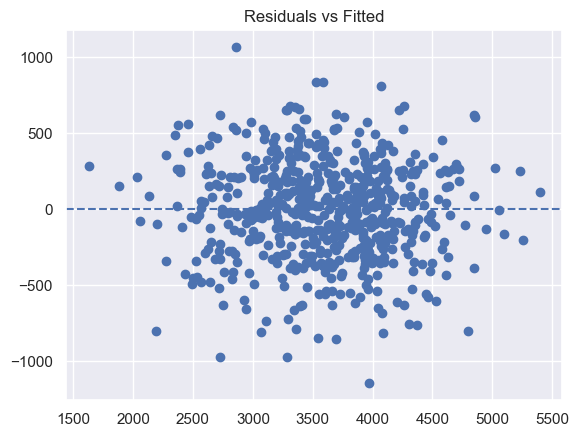

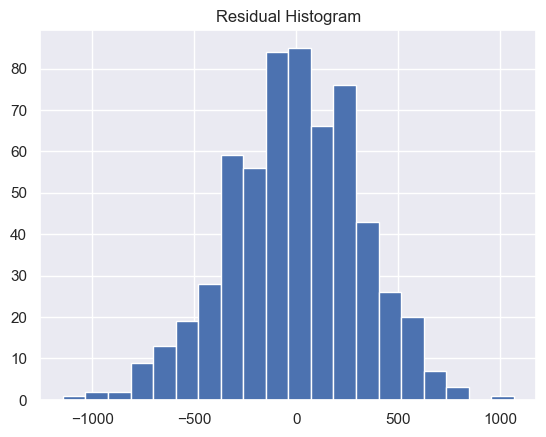

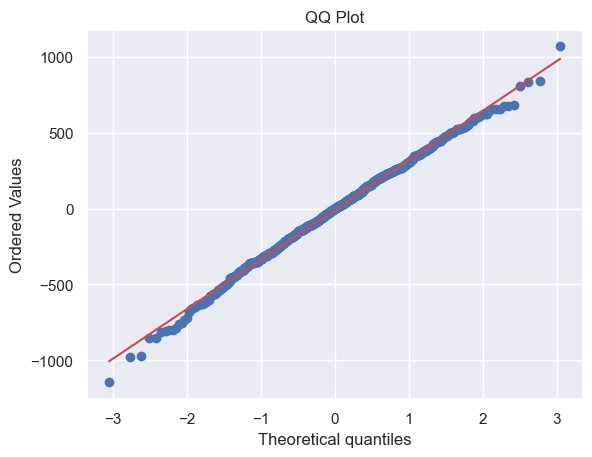

In [9]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [12]:
df['monthly_income_sq'] = df['monthly_income']**2
X2 = df[['monthly_income','budget_goal','financial_scenario_enc','monthly_income_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=0.7612  RMSE=325.778574


## 4) Interpretation (write your conclusions below)
- Linearity:The scatter plot of residuals vs. fitted values shows no obvious curvature; the relationship appears linear.
- Homoscedasticity:The residual variance looks roughly constant across the range of fitted values; no funnel shape is visible.
- Normality: The Q-Q plot of residuals follows the 45° line closely.
- Independence:Residuals exhibit no discernible pattern over time or index.
- Which model do you trust and why?: I trust this simple OLS model because all four key assumptions are met and its out-of-sample R² and RMSE are stable across folds.
- Next step you’d try:Further inspect coefficient magnitudes and significance, then test the robustness of results by winsorizing the top and bottom 1 % of the outcome variable and re-running the regression.